<a href="https://colab.research.google.com/github/bflaggs/DSPS_BFlaggs/blob/main/MC/inclasslab_Oct1_piapprox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import pylab as pl
#!pip install astropy
import astropy
from astropy import units as u
import matplotlib.pyplot as plt


%pylab inline


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['square', 'isin']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


What you know: The ratio of the area of the circle to the area of the square is π / 4.

In [2]:
def square(l, ax):
  ax.plot([-l, l], [-l, -l], 'k-')
  ax.plot([-l, l], [l, l], 'k-')
  ax.plot([-l, -l], [-l, l], 'k-')
  ax.plot([l, l], [-l, l], 'k-')
  

In [3]:
def circle(l, ax):
  theta = np.linspace(0, 360, 100)
  theta *= u.degree
  x = l * np.cos(theta.to(u.rad))
  y = l * np.sin(theta.to(u.rad))
  ax.plot(x, y, 'k-')
  

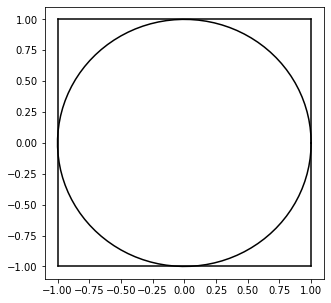

In [4]:
fig, ax = pl.subplots(figsize=(5, 5))
square(1, ax=ax)
circle(1, ax=ax)

In [5]:
def isin(x, y, l):
  if x**2 + y**2 <= l:
    inside = 1
  else:
    inside = 0
  return inside

In [9]:
np.random.seed(123)
Nx = np.random.rand(10000)
Ny = np.random.rand(10000)

print(Nx)
print(Ny)
print(len(Nx))
print(len(Ny))


[0.69646919 0.28613933 0.22685145 ... 0.98514494 0.22066212 0.61329717]
[0.66314239 0.8397864  0.82365438 ... 0.44507334 0.27707334 0.27993699]
10000
10000


In [11]:
totInside = 0
for i in range(len(Nx)):
  isItIn = isin(Nx[i], Ny[i], 1.0)
  totInside = totInside + isItIn

In [12]:
print(totInside)

7864


In [14]:
piMC = (totInside / len(Nx)) * 4
print(piMC)

3.1456


In [15]:
pi

3.141592653589793

In [17]:
Ns = [10, 100, 1000, 5000, 10000, 50000]

piMCs = []

for i in range(len(Ns)):
  Nxs = np.random.rand(Ns[i])
  Nys = np.random.rand(Ns[i])

  totInCircle = 0
  for j in range(len(Nxs)):
    inCircle = isin(Nxs[j], Nys[j], 1.0)
    totInCircle = totInCircle + inCircle

  piMCs.append((totInCircle / len(Nxs)) * 4)

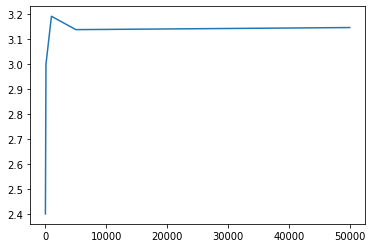

In [19]:
plt.plot(Ns, piMCs)